# A Quantitative Investigation of 5 of Hollywood's Leading Men:
## – Examining the quantity, revenue, ROI, and vote score of movies starring Robert Downey Jr., Nicolas Cage, Leonardo DiCaprio, Tom Cruise, and Brad Pitt between 1986 and 2015 –

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#examination">2. Data Examination</a></li>
<li><a href="#wrangling">3. Data Wrangling</a></li>   
<li><a href="#eda">4. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">5. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

I choose to do my first ever project on using the TMDb movie data set. It contains information from about 10,000 movies gathered from The Movie Database (TMDb), including user ratings and revenue. I choose this project and this database because of my interest in movies.

This is my very first data science project so the type of questions I thought of were perhaps somewhat amateurish. After opening the database and peaking around at the columns and their contents, I brainstormed what questions I thought were interesting to investigate. Initially, I came up with these questions:

- Who was the highest grossing actor in each decade?
- What is the average gross revenue for Nicolas Cage movies?
- Which director is responsible for the highest grossing movies of all time?
- What is the average runtime for comedies verses dramas?
- Which film has the best budget to revenue ratio?
- Is there a correlation between popularity and revenue?
- Which production companies make the highest grossing films?
- Which year(s) had the highest grossing films?
- What is the most common director and actor combination and most?
- What is the most common actor combination?

I refined my questions and narrowed my scope after realizing my skill level limited me as to what I could do. So rather than opting for a general but scattered investigation as I've seen in some similiar projects, I chose to focus on just my five favorite actors and compare them using various metrics and figure out who was, out of those five, the _best_ actor for Hollywood. I mainly looked at these four metrics: quantity of movies, revenue of movies, return on investment (ie, value) of movies, and popularity. My four questions are the following:

1. Who had the highest movie output and movies output rate between 1985 and 2015?
2. Who had the highest average revenue and highest total revenue?
3. Who had the highest average revenue ROI and what is the correlation between ROI and revenue?
4. Who had the highest vote average and what is the correlation between vote average and revenue?

<a id='examination'></a>
## 2. Data Examination

After loading the necessary libaries and packages, I'll take a quick look at the data with `df.head()`, `df.describe()`, and `df.info()` functions. With these functions can gauge the tidiness of the data and mentally prepare for what type of manipulation and cleaning I'll need to do. Here too I expanded my ideas for my analysis and adjusted my questions.

In [42]:
# Import necessary packages and visualization libararies

import pandas as pd
pd.options.mode.chained_assignment = None  # To turn off a default warning
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For formatting x-axis label into dollar form
import seaborn as sns # For box plots and scatterplots
from scipy.stats import linregress # For calculating the r value (correlation)
%matplotlib inline

In [43]:
# Load dataset and print out a few lines

movies_raw = pd.read_csv("tmdb-movies.csv")
movies_raw.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,5,tt0113101,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,NaN,Allison Anders|Alexandre Rockwell|Robert Rodri...,Twelve outrageous guests. Four scandalous requ...,...,It's Ted the Bellhop's first night on the job....,98,Comedy,Miramax Films|A Band Apart,12/25/95,293,6.4,1995,5723867,6153158
1,6,tt0107286,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,NaN,Stephen Hopkins,Don't move. Don't whisper. Don't even breathe.,...,"While racing to a boxing match, Frank, Mike, J...",110,Action|Thriller|Crime,Largo Entertainment|JVC Entertainment Networks,10/15/93,36,6.4,1993,0,18320343
2,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,39575591,2789712242


**Note**: After loading the data, I used the `movies_raw.head()` function to quickly confirm that the dataset was read and formatted correctly from the csv file and used the right separators. For the purposes of my questions, I'll mainly be looking at the `original_title`, `cast`, `release_year`, `budget_adj`, `revenue_adj`, `popularity`, and `vote_count` columns. After I take a closer look at the dataset, I'll proceed to remove columns irrelevant to this project and various other data wrangling tasks. So far, one potential issue that I'll have to address is the `cast` columns that contains multiple actors separated by a pipe character. 

In [44]:
# Inspect data types and look for instances of missing or possibly errant data

movies_raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10863.000000,10863.000000,1.086300e+04,1.086300e+04,10863.000000,10863.000000,10863.000000,10863.000000,1.086300e+04,1.086300e+04
mean,66050.111940,0.646457,1.467736e+07,3.988113e+07,102.070975,217.436159,5.975191,2001.323023,1.763014e+07,5.144542e+07
std,92116.330082,1.000308,3.091383e+07,1.170184e+08,31.385520,575.691262,0.935112,12.813462,3.431312e+07,1.446542e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10594.500000,0.207558,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20656.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75608.000000,0.713777,1.588747e+07,2.410305e+07,111.000000,146.000000,6.600000,2011.000000,2.103337e+07,3.387655e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Note**: After peaking into the dataset with the `movies.head()` call, I examined the statistical info of the ordinal data using `movies.describe()`. I see that this dataset contains data on 10866 movies between 1960 to 2015. Ideally, I would've analyzed the data on a decade-level up to 2020, but due to the limitations of the data set, I'll restructure the "release_year" column into three 10-year periods from 1986. In addition, since I only need data from 1986 onwards, I'll remove all rows that feature data pre-1986. There is some strange data in the "min" row showing many values with 0 that are not NaN. I'll take note of this and address it later if necessary. 
The `popularity` column has a near 0 miniumun value but a max value of 32.98. I looked at the original data and it seems it is not an error, but rather that some movies simply have an arbitrarily high popularity rating. There seems to be no clear range or quantitative measuring method for this popularity score. I could also find no information online about it. Therefore, I will be ignoring it as correlation metric and instead using data from the `vote_average` column which is both clean with no null or 0 values and easy to understand with what looks like as a 0-10 point system.


In [45]:
# Check the list of columns and their respective datatypes

movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10863 non-null  int64  
 1   imdb_id               10853 non-null  object 
 2   popularity            10863 non-null  float64
 3   budget                10863 non-null  int64  
 4   revenue               10863 non-null  int64  
 5   original_title        10863 non-null  object 
 6   cast                  10787 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10819 non-null  object 
 9   tagline               8039 non-null   object 
 10  keywords              9370 non-null   object 
 11  overview              10859 non-null  object 
 12  runtime               10863 non-null  int64  
 13  genres                10840 non-null  object 
 14  production_companies  9833 non-null   object 
 15  release_date       

**Note**: From the `movies.info()` call, we can see a linear list of all the columns in the dataset and their respective data types. All 21 columns are not needed to answer my questions, so I will remove them in a later step.


In [46]:
# Check for null values

movies_raw.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7927
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Note**: Although the `df.info()` does show which columns have null values indirectly, the `df.isnull().sum()` call lays things out much more clearer. From there though, the I can see that though there are null values, they appear entirely justifiable, often found in time-specific categories like "homepage" and "tagline" where a pre-internet age movie wouldn't have such data. The relevant columns look fairly clean, but I'll check them again after I've refined the scope of analysis.

<a id='wrangling'></a>
## 3. Data Wrangling

Here I'll be do the following data cleaning and data wrangling tasks.

1. Remove unnecessary columns
2. Remove unnecessary rows
3. Filter the rows to only display rows with the relevant actors
4. Regroup the `release_year` column into 10-year periods
5. Recheck for null values
6. Check for and remove any budget and revenue values with 0 entries
7. Calculate the return on investment and create a column for it
8. Create a cleaner `starring` column and drop the `cast` column
9. Rearrange column order
10. Summarize results

In [47]:
# 1. Remove unncessary columms and confirm results

movies_cleaning = movies_raw[[
    "original_title", 
    "cast",
    "budget_adj",
    "revenue_adj",
    "release_year",
    "vote_average",
    ]]
movies_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10863 non-null  object 
 1   cast            10787 non-null  object 
 2   budget_adj      10863 non-null  int64  
 3   revenue_adj     10863 non-null  int64  
 4   release_year    10863 non-null  int64  
 5   vote_average    10863 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 509.3+ KB


In [48]:
# 2. Remove unnecessary rows (ie. release years prior to 1986) and confirm results

movies_cleaning = movies_cleaning[movies_cleaning['release_year'] >=1986]
movies_cleaning["release_year"].min()

1986

In [49]:
# 3. Filter the rows to only display rows with the relevant actors

movies_cleaning = movies_cleaning.loc[movies_cleaning["cast"].str.contains(
    "Nicolas Cage|Robert Downey Jr.|Leonardo DiCaprio|Tom Cruise|Brad Pitt", 
    na=False)]
movies_cleaning.head()

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average
23,Twelve Monkeys,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...,42213523,241604446,1995,7.2
32,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,147386354,660714468,2005,5.9
53,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,12662921,105808674,2000,7.5
78,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,104676490,555052814,2001,7.0
80,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,126988994,418768465,2004,6.4


In [50]:
# 4. Group release_year into 10-year periods

bin_edges = [1985, 1995, 2005, 2015]
bin_names = ["1986-1995" ,"1996-2005" ,"2006-2015"]
movies_cleaning["period"] = pd.cut(movies_cleaning['release_year'], bin_edges, labels=bin_names)
movies_cleaning.head()

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average,period
23,Twelve Monkeys,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...,42213523,241604446,1995,7.2,1986-1995
32,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,147386354,660714468,2005,5.9,1996-2005
53,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,12662921,105808674,2000,7.5,1996-2005
78,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,104676490,555052814,2001,7.0,1996-2005
80,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,126988994,418768465,2004,6.4,1996-2005


In [51]:
# 5. Recheck for null values

movies_cleaning.isnull().sum()

original_title    0
cast              0
budget_adj        0
revenue_adj       0
release_year      0
vote_average      0
period            0
dtype: int64

In [52]:
# 6. Repair or remove budgets and revenues of 0
# 6.1 Check if there are any 0 budget entries

if movies_cleaning[movies_cleaning["budget_adj"] == 0].any().sum():
    print("Yes, there are some 0 budget entries! Fix it!")
else:
    print("No, there are no 0 budget entries! Next!")

Yes, there are some 0 budget entries! Fix it!


In [53]:
# 6.2 Identify 0 budget values

movies_cleaning[movies_cleaning['budget_adj'] ==0]

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average,period
5066,Space Station 3D,Tom Cruise|James Arnold|Michael J. Bloomfield|...,0,0,2002,6.1,1996-2005
6416,Stanley Kubrick: A Life in Pictures,Tom Cruise|Stanley Kubrick|Barbara Kroner|Stev...,0,0,2001,7.5,1996-2005
6755,Tropic Thunder: Rain of Madness,Justin Theroux|Jack Black|Steve Coogan|Robert ...,0,0,2008,6.9,2006-2015
7287,Hubble 3D,Leonardo DiCaprio,0,0,2010,6.5,2006-2015
7920,Inception: The Cobol Job,Leonardo DiCaprio|Joseph Gordon-Levitt|Tom Hardy,0,0,2010,7.3,2006-2015
10026,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,0,0,2014,6.3,2006-2015
10799,Hitting the Apex,Brad Pitt|Valentino Rossi|Jorge Lorenzo|Casey ...,0,0,2015,8.0,2006-2015
10832,The Audition,Leonardo DiCaprio|Brad Pitt|Robert De Niro|Mar...,0,0,2015,6.1,2006-2015


> **Analysis**: After doing a quick Google search, I saw that "Hitting the Apex", "The Audition", "Stanley Kubrick: A Life in Pictures", and "Space Station 3D" were all either short films or documentaries. So these insignificant entries can be omitted, which I'll do next. Initially, other 0 budget entries existed but this was missing data budget data was available online and was easier fixed by directly editing  the csv file and reloading the project from the beginning. 

In [54]:
# 6.3 Remove all budget entries

movies_cleaning = movies_cleaning[movies_cleaning["budget_adj"] != 0]

# Reconfirm if there are any 0 budget entries

if movies_cleaning[movies_cleaning["budget_adj"] == 0].any().sum():
    print("Yes, there are some 0 budget entries! Fix it!")
else:
    print("No, there are no 0 budget entries! Next!")

No, there are no 0 budget entries! Next!


In [55]:
# 6.4 Check if there are any 0 revenue entries

if movies_cleaning[movies_cleaning["revenue_adj"] == 0].any().sum():
    print("Yes, there are some 0 revenue entries! Fix it!")
else:
    print("No, there are no 0 revenue entries! Next!")

Yes, there are some 0 revenue entries! Fix it!


In [56]:
# 6.5 Identify 0 revenue values

movies_cleaning[movies_cleaning['revenue_adj'] ==0]

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average,period
8169,Marvel One-Shot: The Consultant,Clark Gregg|Maximiliano HernÃ¡ndez|Tim Roth|Ro...,484699,0,2011,6.7,2006-2015


In [57]:
# 6.6 Remove all 0 revenue entries

movies_cleaning = movies_cleaning[movies_cleaning["revenue_adj"] != 0]

# Reconfirm if there are any 0 revenue entries

if movies_cleaning[movies_cleaning["revenue_adj"] == 0].any().sum():
    print("Yes, there are some 0 revenue entries! Fix it!")
else:
    print("No, there are no 0 revenue entries! Next!")

No, there are no 0 revenue entries! Next!


In [58]:
# 6.7 Confirm that all columns have no "0" entries (output all should be "False")

movies_cleaning[movies_cleaning["revenue_adj"]==0].any().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of original_title    False
cast              False
budget_adj        False
revenue_adj       False
release_year      False
vote_average      False
dtype: bool>

In [59]:
# 7. Calculate the return on investment (ROI) as a percent and create a new column for it

initial = movies_cleaning["budget_adj"]
net = movies_cleaning["revenue_adj"]-movies_cleaning["budget_adj"]

movies_cleaning["ROI%"] = round(((net/initial)*100),2)
movies_cleaning.head()

,original_title,cast,budget_adj,revenue_adj,release_year,vote_average,period,ROI%
23,Twelve Monkeys,Bruce Willis|Madeleine Stowe|Brad Pitt|Christo...,42213523,241604446,1995,7.2,1986-1995,472.34
32,War of the Worlds,Tom Cruise|Dakota Fanning|Miranda Otto|Justin ...,147386354,660714468,2005,5.9,1996-2005,348.29
53,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,12662921,105808674,2000,7.5,1996-2005,735.58
78,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,104676490,555052814,2001,7.0,1996-2005,430.26
80,Ocean's Twelve,George Clooney|Brad Pitt|Catherine Zeta-Jones|...,126988994,418768465,2004,6.4,1996-2005,229.77


In [60]:
# 8. Create a cleaner "starring" column and drop the "cast" column
# 8.1 Clean entry for Nicolas Cage by making separate dataframe

cage_movies = movies_cleaning.loc[movies_cleaning["cast"].str.contains("Nicolas Cage", na=False)]
cage_movies["starring"]="Nicolas Cage"
cage_movies.drop(columns="cast", inplace=True)
cage_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
186,Raising Arizona,11514483,55999305,1987,7.0,1986-1995,386.34,Nicolas Cage
218,Leaving Las Vegas,5151481,71262150,1995,6.9,1986-1995,1283.33,Nicolas Cage
233,Wild at Heart,15854536,24299575,1990,6.5,1986-1995,53.27,Nicolas Cage
385,Face/Off,108676826,333741296,1997,6.7,1996-2005,207.10,Nicolas Cage
409,City of Angels,73573251,265780177,1998,6.4,1996-2005,261.25,Nicolas Cage


In [61]:
# 8.2 Clean entry for Tom Cruise by making separate dataframe

cruise_movies = movies_cleaning.loc[movies_cleaning["cast"].str.contains("Tom Cruise", na=False)]
cruise_movies["starring"]="Tom Cruise"
cruise_movies.drop(columns="cast", inplace=True)
cruise_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
32,War of the Worlds,147386354,660714468,2005,5.9,1996-2005,348.29,Tom Cruise
93,Minority Report,123650662,434441663,2002,6.9,1996-2005,251.35,Tom Cruise
176,Magnolia,48434955,63425971,1999,7.3,1996-2005,30.95,Tom Cruise
181,Eyes Wide Shut,85088435,212185957,1999,6.8,1996-2005,149.37,Tom Cruise
188,Rain Man,46097276,654259434,1988,7.4,1986-1995,1319.30,Tom Cruise


In [62]:
# 8.3 Clean entry for Tom Cruise by making separate dataframe

pitt_movies = movies_cleaning.loc[movies_cleaning["cast"].str.contains("Brad Pitt", na=False)]
pitt_movies["starring"]="Brad Pitt"
pitt_movies.drop(columns="cast", inplace=True)
pitt_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
23,Twelve Monkeys,42213523,241604446,1995,7.2,1986-1995,472.34,Brad Pitt
53,Snatch,12662921,105808674,2000,7.5,1996-2005,735.58,Brad Pitt
78,Ocean's Eleven,104676490,555052814,2001,7.0,1996-2005,430.26,Brad Pitt
80,Ocean's Twelve,126988994,418768465,2004,6.4,1996-2005,229.77,Brad Pitt
153,A River Runs Through It,18648291,67507271,1992,6.7,1986-1995,262.00,Brad Pitt


In [63]:
# 8.4 Clean entry for Robert Downey Jr. by making separate dataframe

downeyjr_movies = movies_cleaning.loc[movies_cleaning["cast"].str.contains("Robert Downey Jr.", na=False)]
downeyjr_movies["starring"]="Robert Downey Jr."
downeyjr_movies.drop(columns="cast", inplace=True)
downeyjr_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
125,Natural Born Killers,50017793,73971558,1994,6.8,1986-1995,47.89,Robert Downey Jr.
715,Iron Man,141790129,592656631,2008,7.3,2006-2015,317.98,Robert Downey Jr.
799,Zodiac,68358458,89166682,2007,7.1,2006-2015,30.44,Robert Downey Jr.
1069,Chances Are,32055653,32656697,1989,6.7,1986-1995,1.88,Robert Downey Jr.
1091,A Scanner Darkly,9194188,5928624,2006,6.7,2006-2015,-35.52,Robert Downey Jr.


In [64]:
# 8.5 Clean entry for Leonardo DiCaprio by making separate dataframe

dicaprio_movies = movies_cleaning.loc[movies_cleaning["cast"].str.contains("Leonardo DiCaprio", na=False)]
dicaprio_movies["starring"]="Leonardo DiCaprio"
dicaprio_movies.drop(columns="cast", inplace=True)
dicaprio_movies.head()

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
220,Romeo + Juliet,20158143,204777203,1996,6.6,1996-2005,915.85,Leonardo DiCaprio
297,Titanic,271692064,2506405735,1997,7.3,1996-2005,822.52,Leonardo DiCaprio
327,Catch Me If You Can,63037592,426854587,2002,7.6,1996-2005,577.14,Leonardo DiCaprio
577,Blood Diamond,108166916,184833372,2006,7.2,2006-2015,70.88,Leonardo DiCaprio
596,The Departed,97350224,313518943,2006,7.7,2006-2015,222.05,Leonardo DiCaprio


In [65]:
# 8.6 Combine the three dataframes into one final dataframe
movies = pd.concat([cage_movies, cruise_movies, pitt_movies, downeyjr_movies, dicaprio_movies])
movies.sort_values(by=['release_year'],inplace=True)
movies.tail(6)

,original_title,budget_adj,revenue_adj,release_year,vote_average,period,ROI%,starring
10181,The Runner,5519998,128748,2015,4.8,2006-2015,-97.67,Nicolas Cage
10542,By the Sea,9199996,3068131,2015,5.4,2006-2015,-66.65,Brad Pitt
9302,Mission: Impossible - Rogue Nation,137999939,627743452,2015,7.1,2006-2015,354.89,Tom Cruise
8587,Avengers: Age of Ultron,257599887,1292632337,2015,7.4,2006-2015,401.80,Robert Downey Jr.
10566,The Big Short,25759989,122678732,2015,7.3,2006-2015,376.24,Brad Pitt
10219,The Revenant,124199945,490314247,2015,7.2,2006-2015,294.78,Leonardo DiCaprio


In [66]:
# 8.7 Confirm results

unique = movies["starring"].unique()
print("The new dataframe only contains movies with {} in the cast.".format(unique))

The new dataframe only contains movies with ['Robert Downey Jr.' 'Tom Cruise' 'Nicolas Cage' 'Brad Pitt'
 'Leonardo DiCaprio'] in the cast.


In [67]:
# 9. Rearrange column order

movies = movies[['original_title', 
                 'starring',
                 'release_year',
                 'period',
                 'budget_adj',
                 'revenue_adj',
                 'ROI%',
                 'vote_average'
                ]]
movies.head(1)

,original_title,starring,release_year,period,budget_adj,revenue_adj,ROI%,vote_average
4581,Back to School,Robert Downey Jr.,1986,1986-1995,21883470,181549250,729.62,6.6


In [68]:
# 10. Summarize 

raw = movies_raw.memory_usage(index=True).sum()
clean = movies.memory_usage(index=True).sum()

print("Summary\n\nDimensions of original data:\n",
      movies_raw.shape[0],"rows\n",
      movies_raw.shape[1],"columns\n"
      )
print("Dimensions of cleaned data:\n",
      movies.shape[0],"rows\n",
      movies.shape[1],"columns\n"
      )
print("Size of raw data: ", raw,"bytes\n",
     "Size of cleaned data: ",clean,"bytes\n",
     "Reduction in size: ", int(raw/clean*-1),"percent"
     )

Summary

Dimensions of original data:
 10863 rows
 21 columns

Dimensions of cleaned data:
 186 rows
 8 columns

Size of raw data:  1825112 bytes
 Size of cleaned data:  12222 bytes
 Reduction in size:  -149 percent


<a id='eda'></a>
## 4. Exploratory Data Analysis

### Research Question 1: Who had the highest movie output and movies output rate between 1985 and 2015?
1. Who appeared in the most movies by period?
2. Who appeared in the most movies in total?
3. Who had the best rate of output?
    

In [69]:
# 1. Who appeared in the most movies by period?
# 1.1 Create df "movie_stats" that counts the number of appearances for each actor and groups the results by 10-year period

movies.groupby("period")["starring"].value_counts() # Creates a multi index but not a plot-ready dataframe

period     starring         
1986-1995  Nicolas Cage         13
           Robert Downey Jr.    13
           Tom Cruise           10
           Brad Pitt             8
           Leonardo DiCaprio     7
1996-2005  Nicolas Cage         16
           Brad Pitt            14
           Tom Cruise           10
           Leonardo DiCaprio     9
           Robert Downey Jr.     7
2006-2015  Nicolas Cage         26
           Robert Downey Jr.    17
           Brad Pitt            15
           Leonardo DiCaprio    11
           Tom Cruise           10
Name: starring, dtype: int64

In [70]:
# 1.2 Add unstack() to transform rows to columns and allow for plotting

movies_stats = movies.groupby("period")["starring"].value_counts().unstack() 
movies_stats

starring,Brad Pitt,Leonardo DiCaprio,Nicolas Cage,Robert Downey Jr.,Tom Cruise
period,,,,,
1986-1995,8,7,13,13,10
1996-2005,14,9,16,7,10
2006-2015,15,11,26,17,10


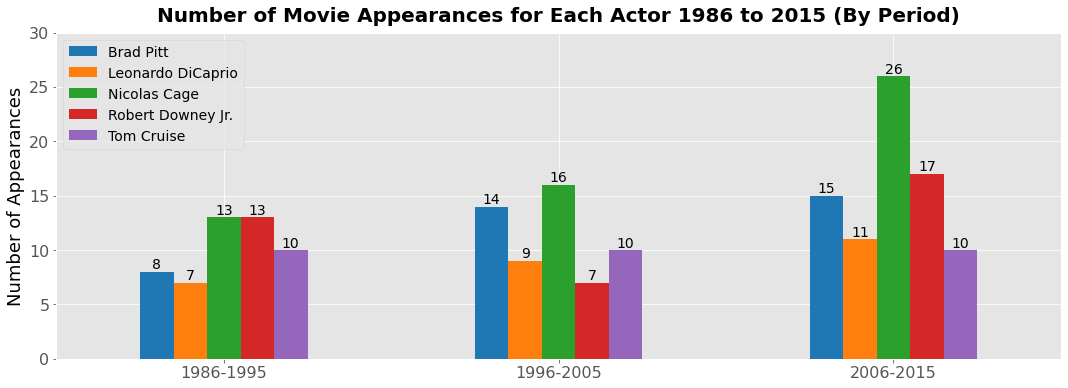

In [75]:
# 1.3 Plot the results of movie_stats

# Define colors for each actor
colors = {'Brad Pitt': 'tab:blue', 
          'Leonardo DiCaprio': 'tab:orange',
          'Nicolas Cage': 'tab:green',
          'Robert Downey Jr.': 'tab:red',
          'Tom Cruise': 'tab:purple'}

# Set base style
plt.style.use("ggplot")

# Plot the results of movie_stats_total
ax = movies_stats.plot.bar(figsize=(18, 6), color=colors)

# Customize plot title and labels
plt.title("Number of Movie Appearances for Each Actor 1986 to 2015 (By Period)", fontweight="bold", size=20 , y=1.015)
plt.xlabel('', fontsize=18, color="black")
plt.ylabel('Number of Appearances', fontsize=18, color="black")
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

# Add legend
plt.legend(loc='upper left', fontsize = 14)

# Create definition to add bar values
def barValue(ax):
    '''
    barPerc(): Add value to bar plots
    args:
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. Access the bars (aka patches)
    bars = ax.patches
    ## 2a. For each bar
    for bar in bars:
        # 3. Add text (.get_height() is the count/value)
        ax.text(bar.get_x() + bar.get_width()/2.,
            bar.get_height(),
            f'{bar.get_height()}',
            ha="center",va="bottom",
            size="14")

# Add bar values
barValue(ax)

# Increase upper limit of y-axis so that the top bar value is comfortably displayed
ax.set(ylim = [0,30])

# Show the plot    
plt.show()


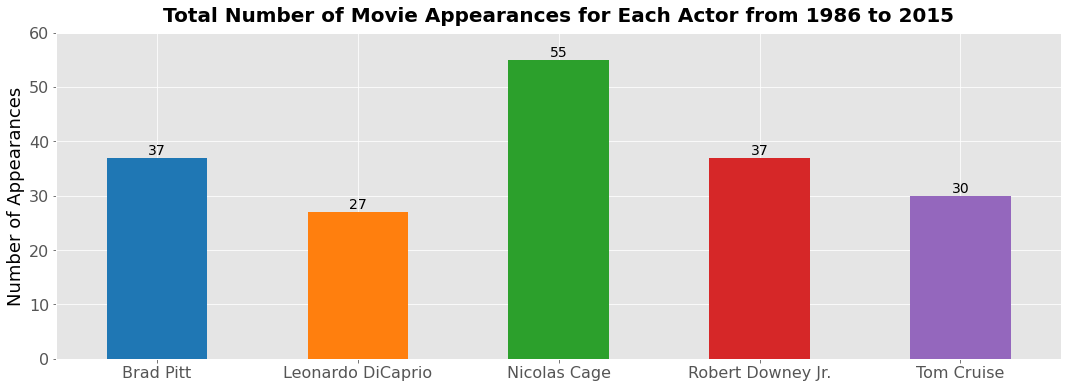

In [76]:
# 2. Who appeared in the most movies in total?

movie_stats_total = movies.groupby("period")["starring"].value_counts().unstack().sum()

# Plot the results of movie_stats_total
ax = movie_stats_total.plot.bar(figsize=(18,6), color=colors.values())

# Customize plot title and labels
plt.title("Total Number of Movie Appearances for Each Actor from 1986 to 2015", fontweight="bold", size=20 , y=1.015)
plt.xlabel('', fontsize=18, color="black")
plt.ylabel('Number of Appearances', fontsize=18, color="black")
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

# Add bar values
barValue(ax)

# Increase upper limit of y-axis so that the top bar value is comfortably displayed
ax.set(ylim = [0,60])

# Show the plot
plt.show()

In [77]:
# 3. Who had the best rate of output between 1986 and 2015?

# Calculate the per year output of each star over 30 years
movie_stats_total/30

starring
Brad Pitt            1.233333
Leonardo DiCaprio    0.900000
Nicolas Cage         1.833333
Robert Downey Jr.    1.233333
Tom Cruise           1.000000
dtype: float64

### Analysis for Research Question 1
**Nicolas Cage** was the clear "winner" in terms of quantity of output. He outperformed Cruise and Pitt in each 10-year period and was especially active between 2006 and 2015. Cage is somewhat known for taking grittier roles and dabbling in gorey horror movies or low-budget crime dramas. Therefore, the turnaround for such movies is much faster than the epic dramas and summer blockbusters Pitt and Cruise are know for. Over 30 years, Cage has put out 55 movies while Cruise, 18 months older than Cage, has starred in _only_ 30 – nearly half as many. He's averaged nearly 2 movies a year for 30 years. Leonardo Dicaprio on the other hand, has the lowest output at only 27 over 30 years. 

### Research Question 2: Who had the highest average revenue and highest total revenue?
1. Analyze the distribution of revenue for each actor
2. Examine the average and total revenue by actor.
3. Extra -- Visualize the highest grossing movie featuring each actor

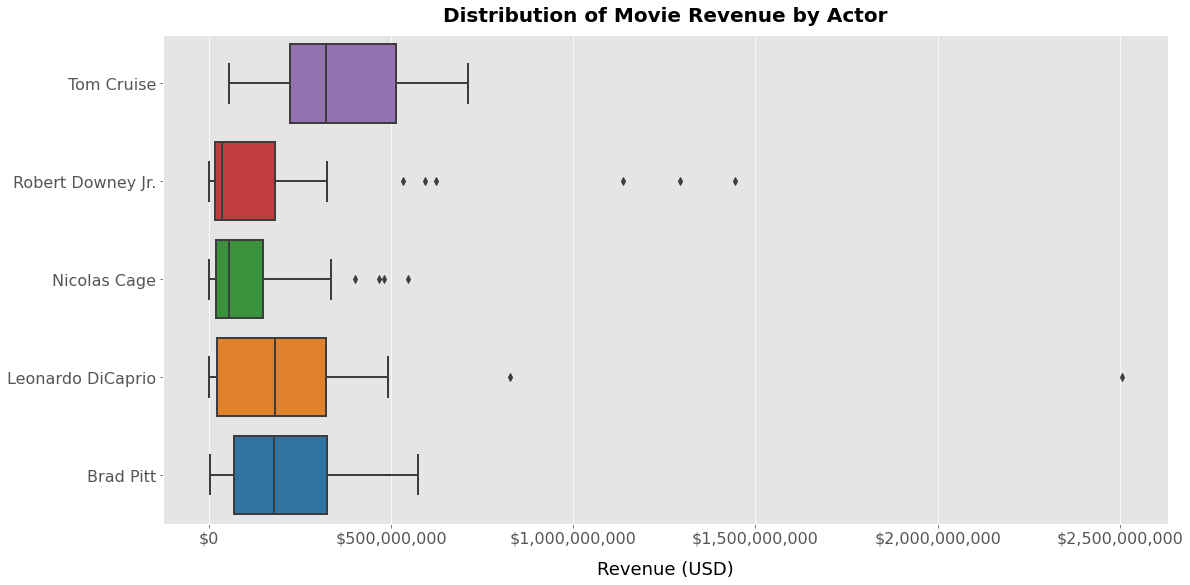

In [78]:
# 1. Analyze the distribution of revenue for each actor

# Isolate data for x and y axes
starring = movies["starring"]
revenue = movies["revenue_adj"]

# Initialize figure, ax, and set figure size for seaborn plot
f, ax = plt.subplots(figsize=(18, 9))

# Set base style
plt.style.use("ggplot")

# Create seaborn boxplot
sns.boxplot(x=revenue, 
            y=starring, 
            orient='h', #horizontal boxplot
            palette=colors,
            linewidth=2,
            order=["Tom Cruise", "Robert Downey Jr.", "Nicolas Cage", "Leonardo DiCaprio", "Brad Pitt"])

# Customize plot title and labels
plt.title("Distribution of Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Revenue (USD)', fontsize = 18, labelpad=14, color="black")
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Format xticks labels with dollar sign and commas 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show plot
plt.show()

**Note**: I initially prepared made a detailed set of histograms to take a look at the distribution of the revenue for movies starring each actor. But after I made them I realized the spread was too wide to show effectively in either 5 separate histograms or 1 histogram overtop each other. A single boxolot is more appropriate when there are outliers like the one for Leonardo Dicaprio. I will see which movie corresponds to this data point.

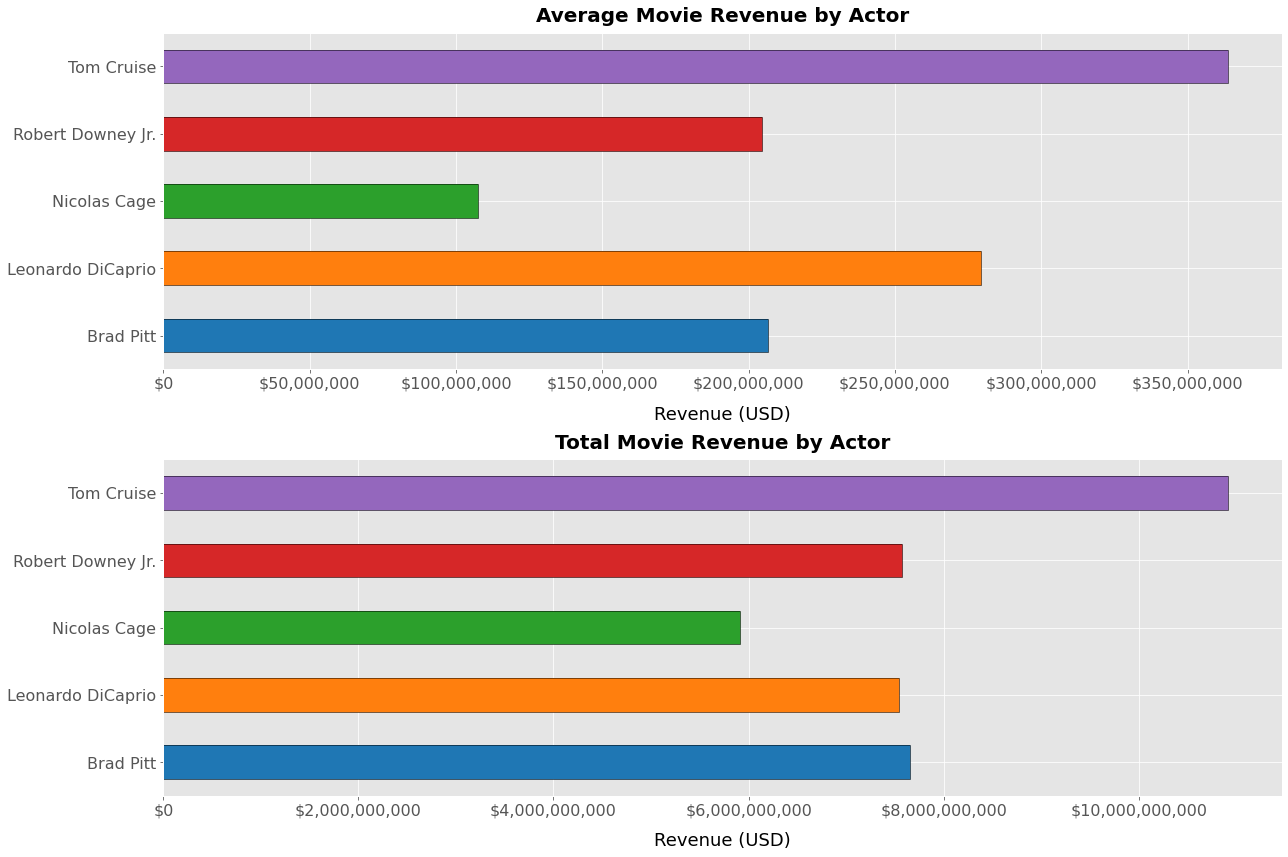

In [79]:
# 2. Examine the average and total revenue by actor

# Get the average revenue and total revenue from movies featuring each actor
mean_revenue = movies.groupby("starring")["revenue_adj"].mean()
total_revenue = movies.groupby("starring")["revenue_adj"].sum()

# Initialize figure, axes, and set figure size
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 12)) 

# Set base style
plt.style.use("ggplot")

# Create matplotlib horizontal bargraphs (axis 1 and axis 2) with preset colors
mean_revenue.plot.barh(color=colors.values(), ax=ax1) 
total_revenue.plot.barh(color=colors.values(), ax=ax2)

# Customize plot title and labels for axis 1
mean_revenue.plot.barh(color=colors.values(), ax=ax1, edgecolor="#000000")
ax1.set_title("Average Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
ax1.set_xlabel('Revenue (USD)', fontsize=18, labelpad=14, color="black")
ax1.set_ylabel('', fontsize=18, labelpad=14, color="black")
ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)

# Customize plot title and labels for axis 2
total_revenue.plot.barh(color=colors.values(), ax=ax2, edgecolor="#000000")
ax2.set_title("Total Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
ax2.set_xlabel('Revenue (USD)', fontsize=18, labelpad=14, color="black")
ax2.set_ylabel('', fontsize=18, labelpad=14, color="black")
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

# Format xticks labels with dollar sign and commas 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.xaxis.set_major_formatter(tick)
ax2.xaxis.set_major_formatter(tick)

# Increase padding between graphs
plt.tight_layout() 

# Show plot
plt.show()

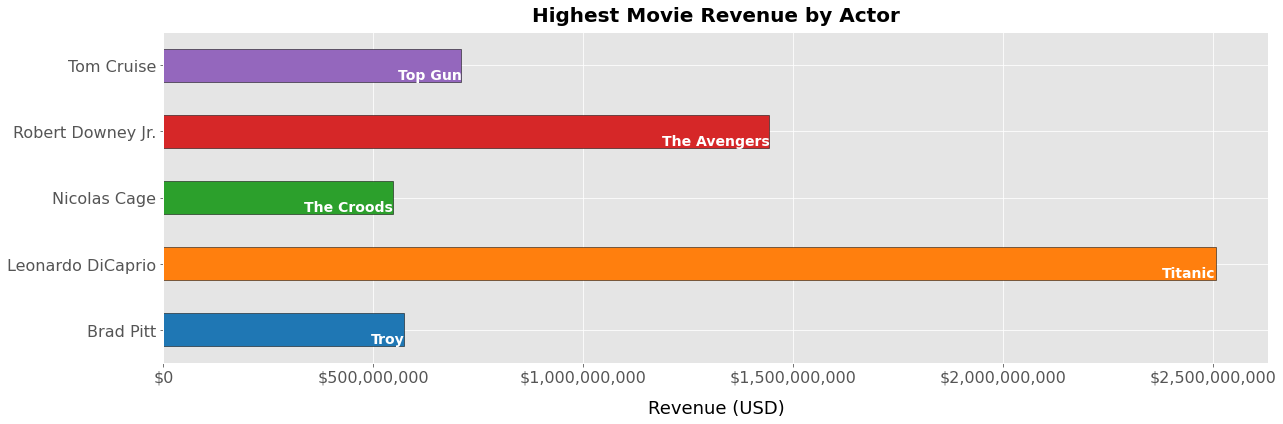

In [80]:
# 3. Extra
# 3.1 Visualize the highest grossing movie featuring each actor

# Get the total revenue for movies featuring each actor
max_revenue = movies.groupby("starring")["revenue_adj"].max()

# Initialize figure, axes, and set figure size
f, ax = plt.subplots(figsize=(18, 6))

# Set base style
plt.style.use("ggplot")

# Create matplotlib horizontal bargraph with preset colors
max_revenue.plot.barh(color=colors.values(), edgecolor="#000000")

# Customize plot title and labels
plt.title("Highest Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Revenue (USD)', fontsize=18, labelpad=14, color="black")
plt.ylabel('', fontsize=16, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Format xticks labels with dollar sign and commas 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
    
# Create definition to add bar values
def barMovies(ax):
    '''
    barMovies(): Add movie title to bar plots
    args:
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. Access the bars (aka patches)
    bars = ax.patches
    # 2. Reorganize
    max_rev_starring_index = movies.loc[movies.groupby('starring').revenue_adj.idxmax()].set_index('starring')
    # 3. Movies array
    film_names = max_rev_starring_index.loc[:,'original_title'].values
    # 4. For each bar
    for ind, bar in enumerate(bars):
    # 5. Add text (film_names[ind] is movie title)
        ax.text(bar.get_x()  + bar.get_width(),
            bar.get_y(),
            f'{film_names[ind]}',
            ha="right",va="bottom", color="white", weight="bold",
            size="14")

# Add bar values
barMovies(ax)

# Increase padding between graphs
plt.tight_layout() 

# Show plot
plt.show()

In [81]:
# 3.2 Peak into highest and lowest ROI movies

movies.sort_values(by=["revenue_adj"],ascending=False).head(15)

,original_title,starring,release_year,period,budget_adj,revenue_adj,ROI%,vote_average
297,Titanic,Leonardo DiCaprio,1997,1996-2005,271692064,2506405735,822.52,7.3
5835,The Avengers,Robert Downey Jr.,2012,2006-2015,208943742,1443191435,590.71,7.3
8587,Avengers: Age of Ultron,Robert Downey Jr.,2015,2006-2015,257599887,1292632337,401.80,7.4
7968,Iron Man 3,Robert Downey Jr.,2013,2006-2015,187206671,1137692373,507.72,6.9
6165,Inception,Leonardo DiCaprio,2010,2006-2015,160000000,825500000,415.94,7.9
377,Top Gun,Tom Cruise,1986,1986-1995,29841096,709881085,2278.87,6.6
506,Mission: Impossible II,Tom Cruise,2000,1996-2005,158286514,691886949,337.11,5.8
7703,Mission: Impossible - Ghost Protocol,Tom Cruise,2011,2006-2015,140562716,673453791,379.11,6.7
32,War of the Worlds,Tom Cruise,2005,1996-2005,147386354,660714468,348.29,5.9
188,Rain Man,Tom Cruise,1988,1986-1995,46097276,654259434,1319.30,7.4


### Analysis for Research Question 2
**Tom Cruise** has the highest average revenue per movie and also the highest total revenue of the five actors between 1986 and 2015. Each one of his 30 movies averaged over 350 million in revenue, nearly 100 million more than second place Leonardo DiCaprio. By individual movie however, DiCaprio takes the crown thanks to his starring in the global blockbuster "Titanic" which generated 2.5 billion in revenue. However, Dicaprio has only made two movies in the top 15 movies by revenue, the second being "Inception". Robert Downey Jr.'s starring role in Marvel movies boosted his revenue average, but prior to these movies, he had more been know for his parts in romantic comedies and dramas which returned only moderate revenue. The same can be said for Brad Pitt who surpisingly has only "Troy" in the top 15... not "Snatch" or "Fight Club" disappointingly. Nicolas Cage's most successful movie, as measured by revenue, was the animated movie "The Croods", shockingly. I expected his late-nighties run of "Con Air", "Face/Off", and "The Rock" to feature in the top 15. But once again, Tom Cruise and his action movies, particularily the "Mission Impossible" movies, seem to be responsible for his high average and high total revenue. The distribution of his movie revenue as well, as seen in the first boxplot, has higher lowers and higher high and a higher median than other actors. He didn't have any outlier box office smashes like Downey Jr. and DiCaprio, however. 

### Research Question 3: Who had the highest average revenue ROI and what is the correlation between ROI and revenue?
1. Investigate the average movie ROI by actor
2. Evaluate the correlation between ROI and revenue

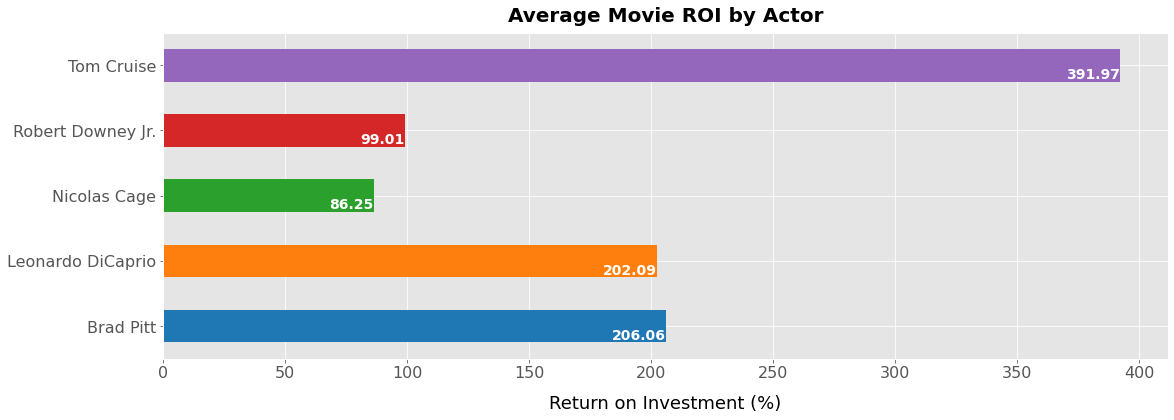

In [82]:
# 1. Investigate the average movie ROI by actor
# 1.1 Vizualize the data

# Get the mean ROI for each actor and round to second decimal
mean_roi = movies.groupby("starring")["ROI%"].mean().round(2)

# Set base style
plt.style.use("ggplot")

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 6))

# Create matplotlib horizontal bargragh with preset colors
mean_roi.plot.barh(color=colors.values())

# Customize plot title and labels
plt.title("Average Movie ROI by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Return on Investment (%)', fontsize = 18, labelpad=14, color="black")
plt.ylabel('', fontsize=16, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Create definition to add bar values
def hbarValue(ax):
    '''
    hbarPerc(): Add value to horizontal bar plots
    args:
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. Access the bars (aka patches)
    bars = ax.patches
    ## 2a. For each bar
    for bar in bars:
        # 3. Add text (.get_width() is the mean/value)
        ax.text(bar.get_x() + bar.get_width(),
            bar.get_y(),
            f'{bar.get_width()}',
            ha="right",va="bottom", color="white", weight="bold",
            size="14")

# Add bar values
hbarValue(ax)

# Show plot
plt.show()

In [83]:
# 1.2 Peak into highest and lowest ROI movies

movies.sort_values(by=["ROI%"],ascending=False)

,original_title,starring,release_year,period,budget_adj,revenue_adj,ROI%,vote_average
377,Top Gun,Tom Cruise,1986,1986-1995,29841096,709881085,2278.87,6.6
188,Rain Man,Tom Cruise,1988,1986-1995,46097276,654259434,1319.30,7.4
218,Leaving Las Vegas,Nicolas Cage,1995,1986-1995,5151481,71262150,1283.33,6.9
977,Born on the Fourth of July,Tom Cruise,1989,1986-1995,24625789,283199562,1050.01,6.3
220,Romeo + Juliet,Leonardo DiCaprio,1996,1996-2005,20158143,204777203,915.85,6.6
...,...,...,...,...,...,...,...,...
3592,The Gingerbread Man,Robert Downey Jr.,1998,1996-2005,36890873,2264463,-93.86,6.2
8857,Stolen,Nicolas Cage,2012,2006-2015,33241050,2000690,-93.98,5.1
6405,The Singing Detective,Robert Downey Jr.,2003,1996-2005,10533513,573582,-94.55,5.5
6811,Total Eclipse,Leonardo DiCaprio,1995,1986-1995,12784733,543173,-95.75,6.3


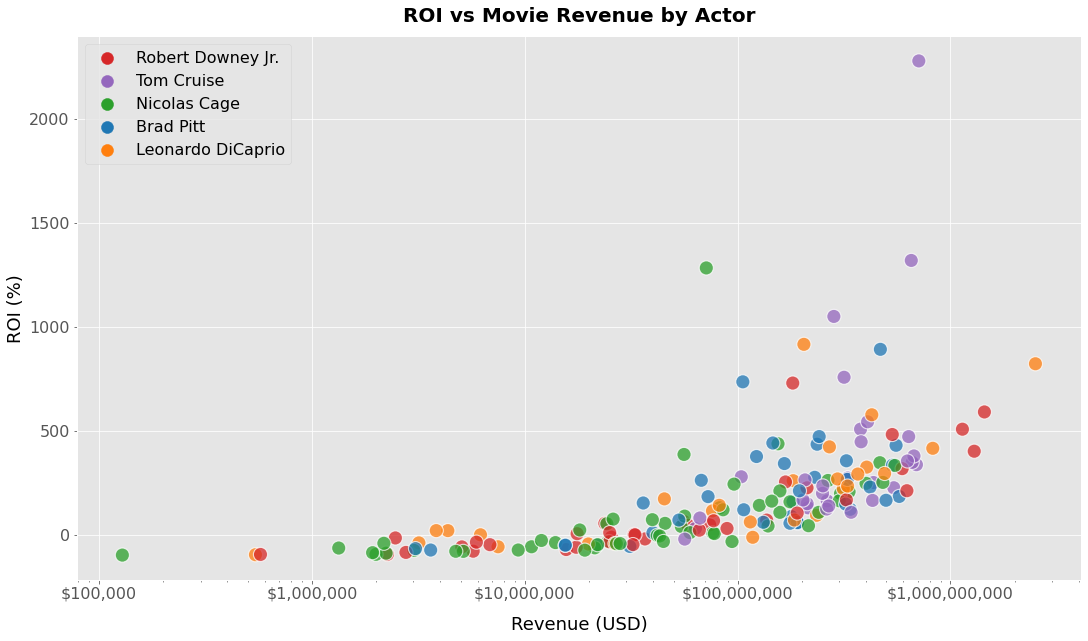

In [84]:
# 2. Evaluate the correlation between ROI and revenue
# 2.1 Visualize the data

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 10))

# Set base style
plt.style.use("ggplot")

# Create seaborn scatterplot object
splot = sns.scatterplot(x="revenue_adj",y="ROI%", data=movies, hue="starring", s=200, palette=colors, alpha=0.75)

# Customize plot title and labels
plt.title("ROI vs Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Revenue (USD)', fontsize=18, labelpad=14, color="black")
plt.ylabel('ROI (%)', fontsize=18, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Create legend
plt.legend(fontsize=16, loc='upper left', markerscale=2)

# Set the `xscale` to log to improve readability
splot.set(xscale="log")

# Format xticks labels with dollar sign and commas
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show plot
plt.show()


In [85]:
# 2.2 Extract the correlation coffiecient (r value)

rvalue = linregress(movies["revenue_adj"], movies["ROI%"])[2]

# Print result
print("The correlation coefficient of revenue and ROI is {}".format(round(rvalue,2)))

The correlation coefficient of revenue and ROI is 0.55


### Analysis for Research Question 3 ###
**Tom Cruise** is the clear winner here with an average ROI of around 400% – nearly twice that of DiCaprio and Pitt and 4 times that of Cage and Downey Jr. Three of the top five ROI movies — "Top Gun", "Rain Man", and "Born on the Fourth of July" – starred Tom Cruise. On the bottom end, both Cage and Downey Jr. have the lowest average ROI of the five actors compared. The two actors each feature two movies in the bottom five ROI. These would be so-called "box-office flops" that cost vastly more money than they generated. Cage though has the fantastic, low-budget critically acclaimed "Leaving Las Vegas" (the green dot in the center) as the third best ROI movie. 

Looking at the scatterplot, which mainly served the purpose as an exercise in making a scatterplot, we can see a clear correlation between ROI and revenue. Generally, as ROI rose, so too did the revenue. An r-value of 0.55 suggests moderate positive correlation between ROI and revenue. However, I do realize that these variables are not independent  so it is a somewhat flawed exercise. A high revenue, by nature, often results in a high ROI since revenue is used to calculate ROI.  

### Research Question 4: Who had the highest vote average and what is the correlation between vote average and revenue?
1. Investigate the vote average by actor
2. Evaluate the correlation between vote average and revenue

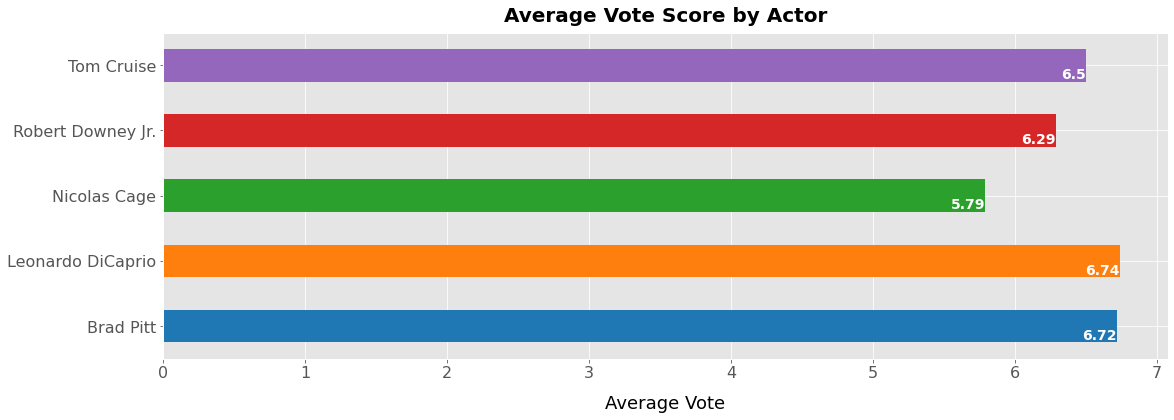

In [86]:
# 1. Investigate the vote average by actor

# Create dataframe showing the average vote count for each actor and round to second decimal place
vote_average = movies.groupby("starring")["vote_average"].mean().round(2)

# Set base style
plt.style.use("ggplot")

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 6))

# Create horizonal matplotlib bargraph with preset colors
vote_average.plot.barh(color=colors.values())

# Customize plot title and labels
plt.title("Average Vote Score by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Average Vote', fontsize=18, labelpad=14, color="black")
plt.ylabel('', fontsize=16, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add bar values
hbarValue(ax)

# Show plot
plt.show()

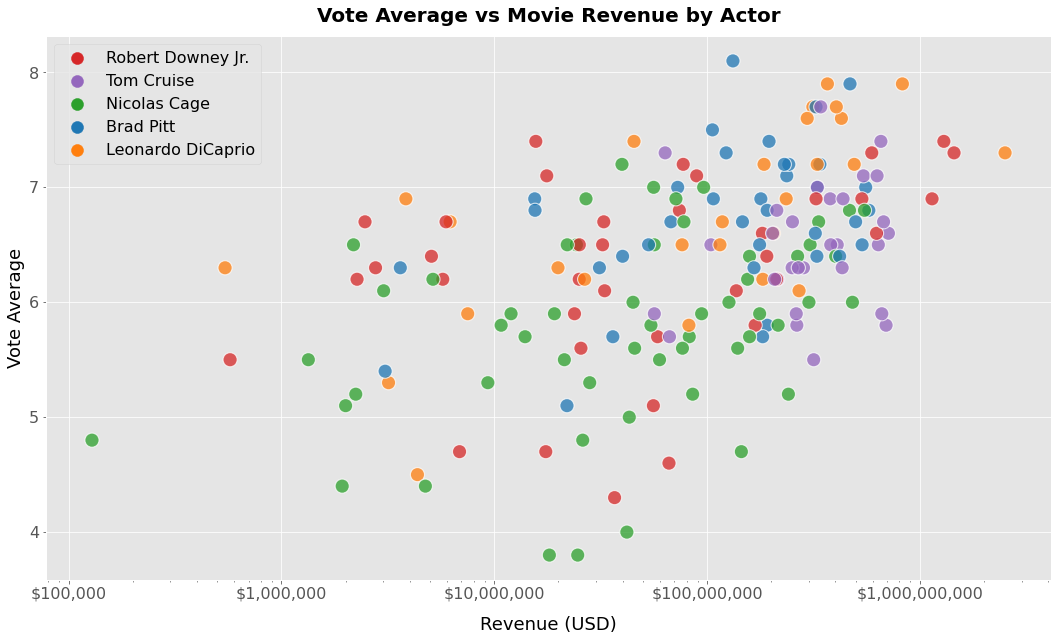

In [87]:
# 2. Evaluate the correlation between vote average and revenue
# 2.1 Visualize the data

# Set base style
plt.style.use("ggplot")

# Initialize figure, ax, and set figure size
f, ax = plt.subplots(figsize=(18, 10))

# Create seaborn scatterplot object
splot2 = sns.scatterplot(x="revenue_adj", 
                         y="vote_average", 
                         data=movies, 
                         hue="starring", 
                         s=200, 
                         palette=colors, 
                         alpha=0.75)

# Customize plot title and labels
plt.title("Vote Average vs Movie Revenue by Actor", fontweight="bold", size=20 , y=1.015)
plt.xlabel('Revenue (USD)', fontsize = 18, labelpad=14, color="black")
plt.ylabel('Vote Average', fontsize=18, color="black")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Create legend
plt.legend(fontsize=16, loc='upper left', markerscale=2)

# Set the `xscale` to log to improve readability
splot2.set(xscale="log")

# Format xticks labels with dollar sign and commas
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Show plot
plt.show()


In [88]:
# 2.2 Extract the correlation coffiecient (r value)

rvalue2 = linregress(movies["revenue_adj"], movies["vote_average"])[2]

# Print result
print("The correlation coefficient of revenue and popularity is {}".format(round(rvalue2,2)))

The correlation coefficient of revenue and popularity is 0.39


### Analysis for Research Question 4 ###
In terms of vote average, **Leonardo Decaprio** is the winner but not by a sustantial margin. With a vote average of about 6.74%, he only edges out ahead of Brad Pitt at about 6.72%. All 5 actors have vote averages between about 5.8% and 6.75% which is not a massive difference. Moreover, the correlation between vote average and revenue is a merely a _strong_ weak correlation. There's no essentially correlation between the two variables on the low end (under 100 million) as evidenced by the full range of but moderate correlation on the higher end (above 500 million).


<a id='conclusions'></a>
## Conclusions

In this project, I set out to answer four questions. Out of my favorite actors – Nicolas Cage, Tom Cruise, Robert Downey Jr., Brad Pitt, and Leonardo DiCaprio – whose movies, between 1986 and 2015, had 
- the highest movie output and movies output rate?
- the highest average revenue and highest total revenue?
- the highest average revenue ROI and what is the correlation between ROI and revenue?
- and the highest vote average?

I also wanted to see if there was a correlation both between ROI and revenue and between vote average and revenue. This was to ultimately answer the question of who, out of these 5, is the most lucrative for Hollywood. 

- **Nicolas Cage** had the highest movie output and rate so he is the most _prolific_ of the actors. But his ROI, average revenue, highest revenue movie, and vote average were all the lowest of the 5 actors. I could say much about his movies, and each of the actors as closing words, but this project is already long enough so I'll just say that Cage is not the best for Hollywood.
- **Robert Downey Jr.** has had an interesting career. Lots of small budget, small revenue romantic comedies and drama then dealt with substance abuse in the late nineties and didn't act often. He only had 7 movies between 96 and and 2005. From 2010 onwards though, Downey Jr. was Iron Man and lead the hugely successful Marvel series. If the dataset continued to 2020 and I looked at a 10-year bin from 2010 to 2019, I speculate that he would be at the top the ranking of all metrics. However, as it stands, he has a relatively low ROI and average revenue so he does not win.
- **Brad Pitt** was neither highest or lowest in any category. He just barely lose out to Dicaprio in the ROI category however so it must be said he is of great value to Hollywood. If there was a category for "Movies Loved by People Named Keenan" then he'd be at the top. Other than World War Z and Troy, his highest grossing movie I discovered, he didn't feature in any big budget, big box-office summer movies. 
- **Leonard DiCaprio** starred in the mega-blockbuster "Titanic", which until "Avatar" and then Robert Downey Jr.'s "Avengers: Endgame", was the highest grossing film on record. He doesn't star in films that often though – starring on only 27 in 30 years, the lowest of the 5 actors – and is 4th place in terms of overall movie revenue. His movies are the most liked though, gaining the highest vote average of 6.74%. He is still a megastar and gifted actor talent but not _the best_ for Hollywood.
- **Tom Cruise** takes the crown as _the best_ for Hollywood out of these five actors. Based on average and total revenue and best ROI by nearly double, he has filled pockets of Hollywood exectives the most and does it consistantly with the best value. He does so enjoyably too, scoring a 6.5 vote average, just behind Dicaprio and Pitt, meaning that his action movies he stars in not only make a lot of money but are well-recieved. In particular is 80s movies "Top Gun", "Rain Man", and "Born on Fourth of July" were incredibly well-recieved based on their stellar ROI value. 


As for correlation, ROI is a clear albeit flawed metric for predicting revenue. A high ROI typically results in a high revenue. I'm sure I'll learn in the next statistics course that such a metric should be disqualified, but I kept the graph because I put the work in and look forward to feedback from reviewers. Vote average on the other hand was much less clear. It cannot be said that movies with high vote averages will result in high revenue. Although, high revenue movies do typically have high vote average movies. High revenue and low vote average data points were not observed so that suggests some positive correlation between the two variables. If the `population` variable had been easier to understand perhaps that could have been a useful metric such was the nature of the data set.

## Problems and Limitations
- I couldn't easily decide whether it was better to use a logarthimic scale or normal scale for the scatterplots. Because of Titanic, with its 2.5 billion in revenue, the x-axis was pulled to the right leaving the majority of movies either squished to the left side or down the bottom left side and a large void in the center. However, for the "Vote Average vs Revenue" scatterplot, using the normal scale would've been much more striking with the the majority of data points crowded against the bottom end of the x-axis (revenue) but distributed evenly along the y-axis (vote average). Even now I don't know the right answer.
- Since this was my first project, I also struggled with simply what was an appropriate _voice_ for writing the project. From the titles, introduction, analyses, and conclusion, I never knew if what I wrote was _appropriate_ for my audience. Should I have be making it for the Udacity reviewers? If that's the case, documenting and recording the process, warts and all, should be expected. Or is it for the public and potential employers? I so, I should leave the warts and bumps out, and present it like a completely perfect finished product and write it with confidence like a pro where all problems are not acknowledged but simply coded properly. How candid should I be in my markdown? Is my voice/tone too casual? Too much "stream of consciousness" and "thinking out loud"? Did I try and write parts like an essay? Are my inter-code markdowns too frequent and over-detailed? Not detailed enough? Overall, I don't know the _degree of appropriateness_ of non-code content of projects because I've never done one nor have that much exposure to model projects. Therefore, I hope the Udacity reviewers will give me **lots** of constructive feedback so that I can improve more than just my coding skills. I'm hoping the reviewer will tell me where my code is repetitive and if appropriate, instruct me how to use a function for some of my codes. I'd like to put this project in my portfolio eventually so I'd like further revise it.
- I shot myself in the foot by choosing these 5 actors. I intially chose 3 but noticed my data was a little week so I expanded my scope. The problem with this though was that the data set is incomplete. The revenue/revenue_adj and budget/budget_adj fields had serveral 0 and null values that were not appropriate to just drop or fill with some sort of mean value. I had to enter them in manually. This was incredibly time consuming. Searching for the revenue and budget for some of these movies was quite difficult and I had to sign up for a free trial of TMDB Pro just to find some of the missing data. Then, I had to convert the budget and revenue data to the adjusted values (2015 equivalent) so that I could compare things properly. I used the website https://www.usinflationcalculator.com/ to convert any the values to a 2015 equivalent. I left some values empty on purpose (documentaries, shorts, etc.) so I could show me removing/dropping them using code.
- This project took well over 6 weeks. Initially, when I finally got to the project after the lessons, I felt completely unprepared as to what to do so spent days working through pandas cookbooks exercises and doing youtube visualization lessons on jupyter. I looked through the walkthrough that the presenter presented but I still felt lost. Once I got started, I spent most of time googling all the tracebacks I got and being frustrated. I asked Udacity's mentors for help, for which I'm grateful for their (mainly Miles') explanations. I also have a newborn that I'm looking after so finding time to finish was difficult. Therefore, there may be some cohesion and flow issues to the project because it was spread over such a long time. I'm frankly just happy to get it done after sinking so much time into it. It was a good "trial by fire" learning experience though.

## References

- For formatting xticks labels with dollar sign and commas 
(https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels)
- Setting to logscale 
(https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#log)
- Adding numerical value to bar graph (https://knowledge.udacity.com/questions/582794)
- Reassigning index and adding value text to horizontal bar graph (https://knowledge.udacity.com/questions/589760)
- Adding a line of best fit to a scatter (unused)
(https://knowledge.udacity.com/questions/589841)
    